## Phase 1: Vorbereitung

In [34]:
# 0. Bibliotheken
import pandas as pd             # Bibliothek für Datenanalyse, Tabellenverarbeitung
import matplotlib.pyplot as plt # Bibliothek für Diagramme und Visualisierungen
import seaborn as sns           # Erweiterung von matplotlib für statistische Visualisierungen

# 1. Einlesen des Rohdatensatzes
dateipfad = r"C:\Users\denni\OneDrive\Desktop\Abschlußprojekt\deep_sea_corals.csv"  # Pfad zur CSV-Datei (raw)
df = pd.read_csv(dateipfad, encoding="ISO-8859-1", low_memory=False)               # CSV einlesen mit korrektem Encoding (für Sonderzeichen), alle Spalten laden


In [35]:
# 2. Spaltenübersetzung (inkl. Datentyp)
df = df.rename(columns={
    "CatalogNumber": "Katalognummer",                   # float64
    "DataProvider": "Datenquelle",                      # object
    "ScientificName": "WissenschaftlicherName",         # object
    "VernacularNameCategory": "UmgangsnameKategorie",   # object
    "TaxonRank": "TaxonomischeRangstufe",               # object
    "ObservationDate": "Beobachtungsdatum",             # datetime64[ns]
    "latitude": "Breitengrad",                          # float64
    "longitude": "Längengrad",                          # float64
    "DepthInMeters": "TiefeMeter",                      # float64
    "DepthMethod": "Tiefenmessmethode",                 # object
    "Locality": "Fundort",                              # object
    "LocationAccuracy": "Ortsgenauigkeit",              # object
    "SurveyID": "ErhebungsID",                          # object
    "Repository": "Archiv",                             # object
    "IdentificationQualifier": "Bestimmungszusatz",     # object
    "EventID": "EreignisID",                            # object
    "SamplingEquipment": "Probengerät",                 # object
    "RecordType": "Beobachtungstyp",                    # object
    "SampleID": "ProbenID",                             # object
    "Station": "Station"                                # object
})


In [36]:
# 3. Datumsfelder konvertieren
df["Beobachtungsdatum"] = pd.to_datetime(df["Beobachtungsdatum"], errors="coerce")  
# Textwerte in echtes Datumsformat umwandeln, ungültige Einträge als NaT (missing date)


In [37]:
# 4. Geokoordinaten in Float umwandeln (falls nötig)
df["Breitengrad"] = pd.to_numeric(df["Breitengrad"], errors="coerce")  # Konvertiert Breitenwerte zu float, ungültige Werte werden zu NaN
df["Längengrad"] = pd.to_numeric(df["Längengrad"], errors="coerce")    # Konvertiert Längenwerte zu float, ungültige Werte werden zu NaN


In [38]:
# 5. Leere Spalten (über 90% fehlend) entfernen
df = df.dropna(thresh=len(df) * 0.1, axis=1)  # Behalte nur Spalten, die mindestens 10 % gültige Werte haben; löscht extrem lückenhafte Spalten


In [39]:
# 6. Duplikate entfernen
df = df.drop_duplicates()


In [40]:
# 7. Index zurücksetzen
df = df.reset_index(drop=True)  # alten Index löschen, neuen fortlaufenden Index erstellen (ohne alte Spalte zu behalten)


## Phase 2: Struktur & Qualität

In [41]:
# 8. Nicht-Null-Anteil je Spalte anzeigen
print(df.isnull().sum().sort_values(ascending=False))


Station                   259783
ErhebungsID               207145
Fundort                   123728
ProbenID                  111079
EreignisID                 41232
Ortsgenauigkeit            28711
Probengerät                27490
Bestimmungszusatz          24782
Archiv                     16789
Tiefenmessmethode          16528
Beobachtungsdatum          15796
Beobachtungstyp            12296
UmgangsnameKategorie         176
TaxonomischeRangstufe          9
Katalognummer                  1
Datenquelle                    1
WissenschaftlicherName         1
Längengrad                     1
Breitengrad                    1
TiefeMeter                     1
dtype: int64


In [42]:
# 9. Statistische Übersicht
print(df.describe(include='all').transpose())  # Zeigt Verteilung, Häufigkeit, Lücken je Spalte – auch für Kategorien


                           count  unique  \
Katalognummer           513372.0     NaN   
Datenquelle               513372      59   
WissenschaftlicherName    513372    2888   
UmgangsnameKategorie      513197      17   
TaxonomischeRangstufe     513364      13   
Station                   253590   13431   
Beobachtungsdatum         497577     NaN   
Breitengrad             513372.0     NaN   
Längengrad              513372.0     NaN   
TiefeMeter              513372.0     NaN   
Tiefenmessmethode         496845       5   
Fundort                   389645    6458   
Ortsgenauigkeit           484662       6   
ErhebungsID               306228    1483   
Archiv                    496584      62   
Bestimmungszusatz         488591      55   
EreignisID                472141    5725   
Probengerät               485883      24   
Beobachtungstyp           501077       8   
ProbenID                  402294  256762   

                                                             top    freq  \

In [43]:
# 10. Top 5 Datenquellen
print(df["Datenquelle"].value_counts().head(5))


Datenquelle
Monterey Bay Aquarium Research Institute                195478
NOAA, Alaska Fisheries Science Center                    74377
NOAA, Southwest Fisheries Science Center, Santa Cruz     43576
NOAA, Olympic Coast National Marine Sanctuary            36279
Hawaii Undersea Research Laboratory                      35101
Name: count, dtype: int64


In [44]:
# 11. Verteilung pro Spalte (z. B. Beobachtungstyp)
print(df["Beobachtungstyp"].value_counts())


Beobachtungstyp
video observation              370375
still image                     46402
catch record                    41520
specimen                        41213
literature                        815
notation                          749
literature/specimen                 2
specimen; video observation         1
Name: count, dtype: int64


## Phase 3: Zeitliche Analyse

In [45]:
df_zeit = df.dropna(subset=["Beobachtungsdatum"])  # Nur Einträge mit Datum verwenden
df_zeit["Jahr"] = df_zeit["Beobachtungsdatum"].dt.year


C:\Users\denni\AppData\Local\Temp\ipykernel_9544\1953392671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zeit["Jahr"] = df_zeit["Beobachtungsdatum"].dt.year


In [46]:
# 12. Jahr extrahieren
df["Jahr"] = df["Beobachtungsdatum"].dt.year


<Axes: title={'center': 'Beobachtungen pro Jahr'}, xlabel='Jahr'>

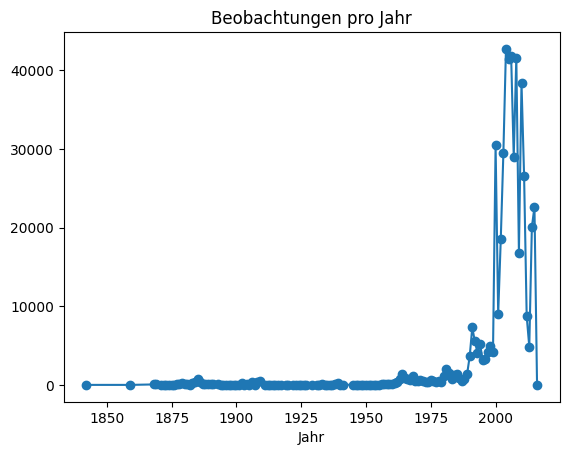

In [47]:
# Beobachtungen pro Jahr als Liniendiagramm
df["Jahr"].value_counts().sort_index().plot(kind="line", title="Beobachtungen pro Jahr", marker='o')


<Axes: title={'center': '3-Jahres-Durchschnitt der Beobachtungen'}, xlabel='Jahr'>

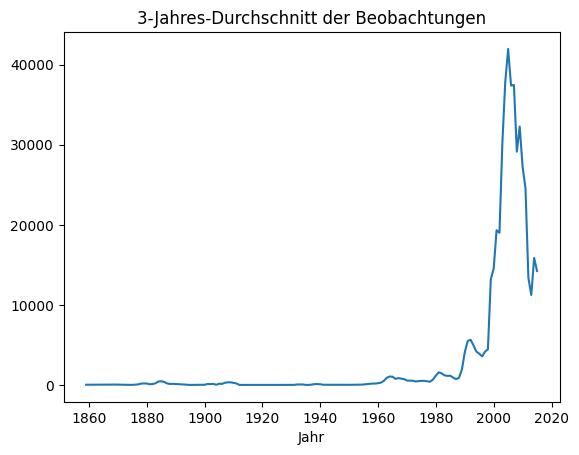

In [48]:
# Gleitender Mittelwert über 3 Jahre
jahres_counts = df["Jahr"].value_counts().sort_index()
jahres_counts.rolling(window=3, center=True).mean().plot(title="3-Jahres-Durchschnitt der Beobachtungen")


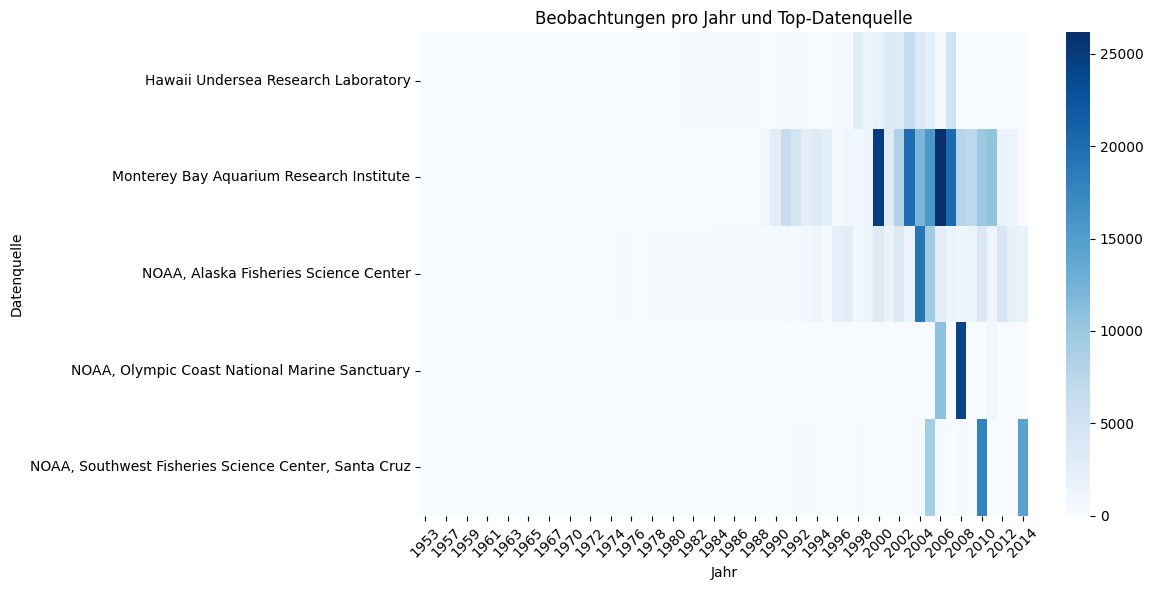

In [49]:


# Top 5 Datenquellen bestimmen
top_quellen = df["Datenquelle"].value_counts().head(5).index
subset = df[df["Datenquelle"].isin(top_quellen)]

# Pivot-Tabelle: Jahre x Datenquellen
pivot = subset.pivot_table(index="Jahr", columns="Datenquelle", aggfunc="size", fill_value=0)

# Heatmap erzeugen
plt.figure(figsize=(12, 6))
ax = sns.heatmap(pivot.T, cmap="Blues")  # Alternativ: "coolwarm", "YlGn", "crest"

# X-Achsen-Beschriftungen formatieren
x_labels = [str(int(float(label.get_text()))) for label in ax.get_xticklabels()]
ax.set_xticklabels(x_labels, rotation=45)

# Achsentitel und Layout
plt.xlabel("Jahr")
plt.ylabel("Datenquelle")
plt.title("Beobachtungen pro Jahr und Top-Datenquelle")
plt.tight_layout()
plt.show()


In [50]:
# Beobachtungen pro Jahr in Tabelle anzeigen
jahre = df["Jahr"].value_counts().sort_index()
print(jahre)


Jahr
1842.0        5
1859.0        4
1868.0       60
1869.0       69
1871.0        3
          ...  
2012.0     8734
2013.0     4882
2014.0    20079
2015.0    22610
2016.0        4
Name: count, Length: 141, dtype: int64


##  Phase 4: Taxonomische Analyse

In [51]:
# 14. Top 10 Arten
print(df["WissenschaftlicherName"].value_counts().head(10))


WissenschaftlicherName
Porifera                 77066
Heteropolypus ritteri    21447
Lophelia pertusa         20304
Pennatulacea             17672
Stylaster sp.            14595
Hexactinellida           10438
Gorgonacea                9856
Paragorgia sp.            9416
Farrea occa               7979
Funiculina sp.            7389
Name: count, dtype: int64


In [52]:
# 15. Seltene Arten (nur 1x dokumentiert)
print((df["WissenschaftlicherName"].value_counts() == 1).sum())


766


In [53]:
# 16. Anzahl Arten pro Rangstufe
print(df.groupby("TaxonomischeRangstufe")["WissenschaftlicherName"].nunique())


TaxonomischeRangstufe
class            3
family         123
forma            2
genus          633
order           15
phylum           1
species       2036
subclass         7
subfamily       10
subgenus        34
suborder         6
subspecies      33
variety          3
Name: WissenschaftlicherName, dtype: int64


## Phase 5: Räumliche Analyse

In [54]:
df_region = df.dropna(subset=["Fundort"])  # Nur mit vorhandenen Fundorten arbeiten
vielfalt_je_ort = df_region.groupby("Fundort")["WissenschaftlicherName"].nunique()


In [55]:
# 17. Top 10 Fundorte
print(df["Fundort"].value_counts().head(10))


Fundort
Davidson Seamount                                                                   40114
Pioneer Seamount                                                                    23971
OLYMPIC COAST                                                                       22478
Rodriguez Seamount                                                                  18702
Olympic Coast National Marine Sanctuary                                             14042
Alaska; Aleutian Islands                                                            12021
Southern California Bight; Channel Islands National Marine Sanctuary; Piggy_Bank    11587
Viosca Knoll                                                                         9982
Shutter ridge                                                                        8351
Alaska; Gulf of Alaska                                                               7369
Name: count, dtype: int64


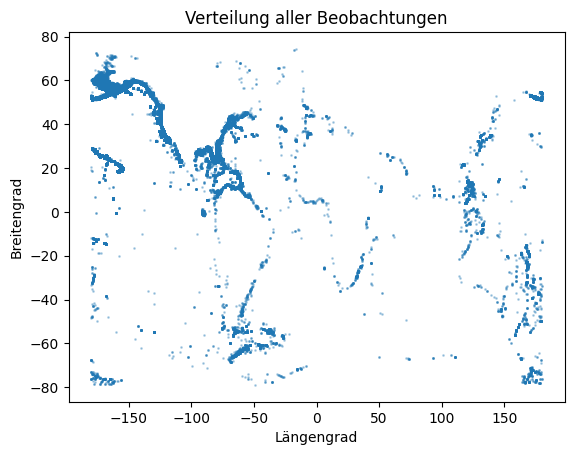

In [56]:
# 18. Streudiagramm: Koordinaten
import matplotlib.pyplot as plt
plt.scatter(df["Längengrad"], df["Breitengrad"], s=1, alpha=0.3)
plt.title("Verteilung aller Beobachtungen")
plt.xlabel("Längengrad")
plt.ylabel("Breitengrad")
plt.show()


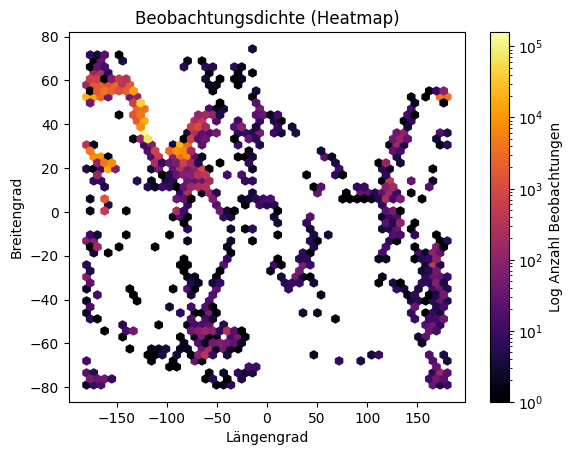

In [57]:
# 19. Heatmap nach Koordinaten
plt.hexbin(df["Längengrad"], df["Breitengrad"], gridsize=50, cmap="inferno", bins="log")
plt.colorbar(label="Log Anzahl Beobachtungen")
plt.xlabel("Längengrad")
plt.ylabel("Breitengrad")
plt.title("Beobachtungsdichte (Heatmap)")
plt.show()


## Phase 6: Tiefenanalyse

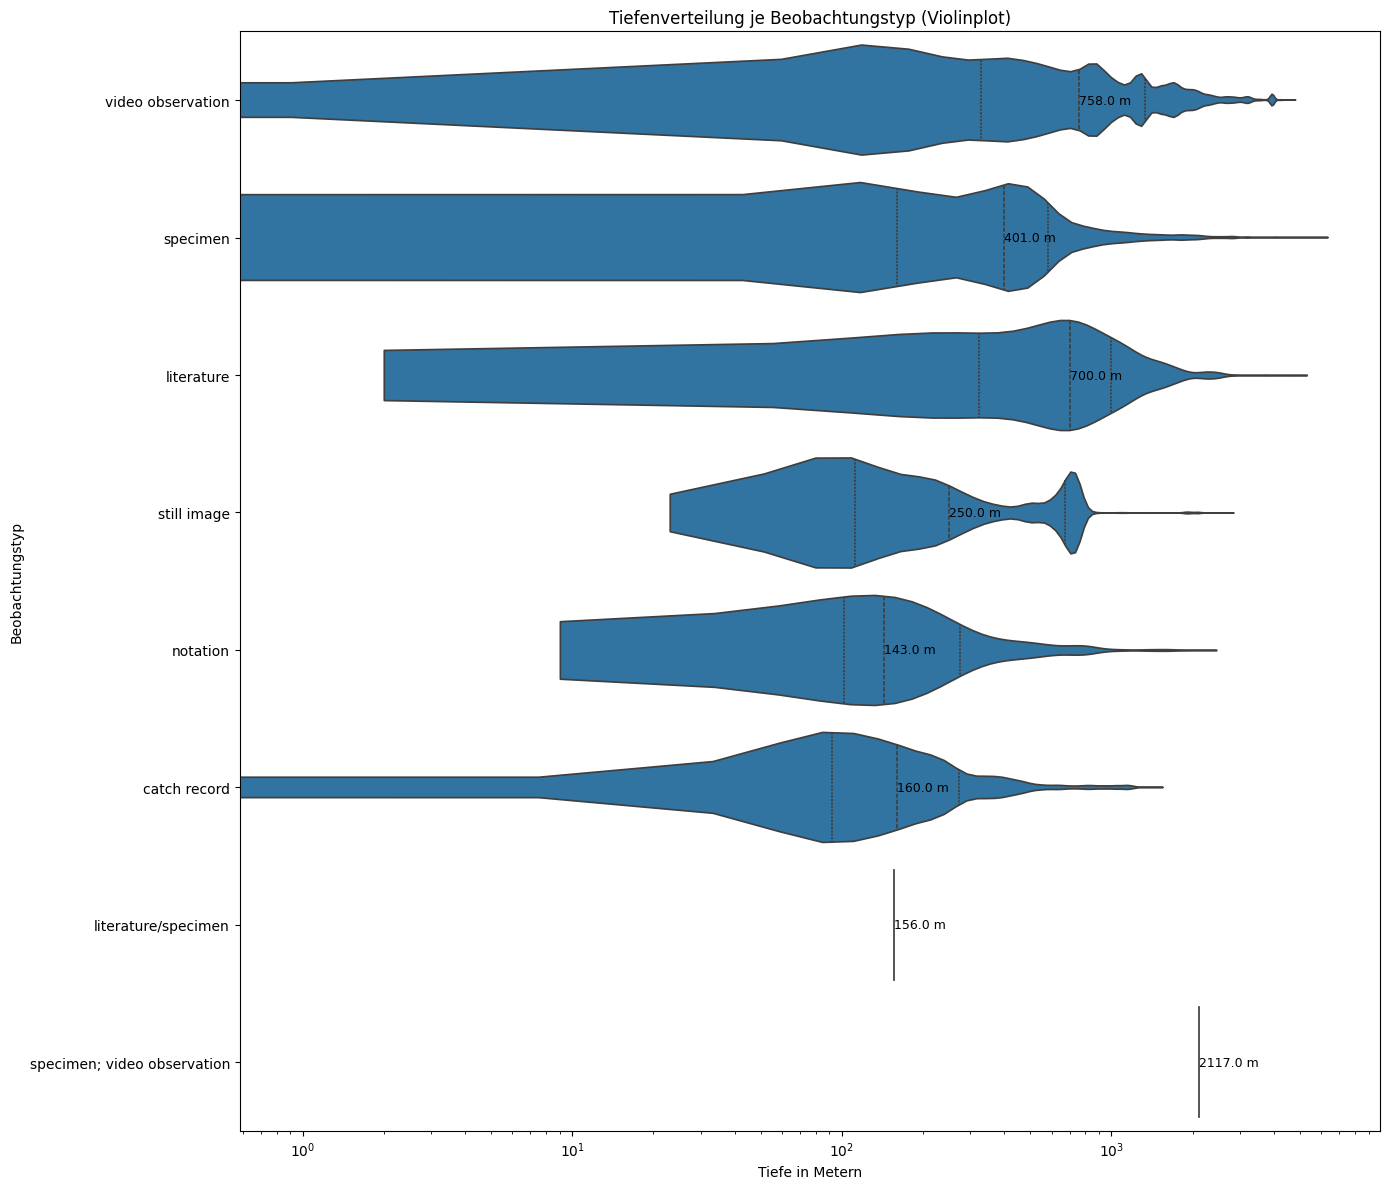

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Neue Figur mit mehr Höhe (12) und Breite (14)
fig, ax = plt.subplots(figsize=(14, 12))  # Mehr Platz nach unten

# Violinplot mit logarithmischer X-Achse
sns.violinplot(
    data=df,
    y="Beobachtungstyp",
    x="TiefeMeter",
    density_norm="width",
    inner="quartile",
    cut=0,
    ax=ax
)

# X-Achse skalieren & beschriften
ax.set_xscale("log")
ax.set_xlabel("Tiefe in Metern")
ax.set_ylabel("Beobachtungstyp")
ax.set_title("Tiefenverteilung je Beobachtungstyp (Violinplot)")

# Mediane berechnen
medians = (
    df[["Beobachtungstyp", "TiefeMeter"]]
    .dropna()
    .groupby("Beobachtungstyp")["TiefeMeter"]
    .median()
)

# Y-Achsenkoordinaten ermitteln
y_ticks = ax.get_yticks()
y_labels = [label.get_text() for label in ax.get_yticklabels()]

# Medianbeschriftungen rechts neben jeder Violine
for i, label in enumerate(y_labels):
    if label in medians:
        medianwert = round(medians[label], 1)
        ax.text(
            x=medians[label] + 0.2,
            y=i,
            s=f"{medianwert} m",
            va="center",
            ha="left",
            fontsize=9,
            color="black"
        )

# Ränder großzügiger
plt.subplots_adjust(left=0.25, right=0.95, top=0.95, bottom=0.05)
plt.tight_layout()
plt.show()


## **Fazit zur Visualisierung: Tiefenverteilung je Beobachtungstyp (Violinplot)**

Ich erkenne anhand dieses Violinplots die **Verteilung und Häufigkeit der dokumentierten Tiefen** (in Metern) je nach Art der **Beobachtung**. Die X-Achse zeigt die **Tiefe** (logarithmisch skaliert), die Y-Achse die **Beobachtungstypen**, wie zum Beispiel „video observation“ oder „specimen“. Jeder „Geigenkörper“ zeigt mir:

* **Breite der Fläche** = wie viele Beobachtungen in diesem Tiefenbereich liegen (je breiter, desto häufiger).
* **Mittellinie** = Median der Tiefen pro Beobachtungstyp.
* **Kanten** = Spannweite (Minimum–Maximum bzw. Interquartilbereich).

---

### Was ich konkret ablesen kann:

1. **„video observation“ und „specimen“** decken ein **sehr breites Tiefenspektrum** ab, inklusive tiefer Regionen über 1000 m.
2. **„still image“** ist stärker in mittleren Tiefen vertreten, aber weniger in extremen Tiefen.
3. **„notation“, „literature“ und „catch record“** erscheinen mit **klar begrenzten Tiefenbereichen**, meist < 500 m.
4. Die Kategorien **„literature/specimen“ und „specimen; video observation“** enthalten **sehr wenige Daten** – das erkenne ich daran, dass deren Violinformen sehr schmal oder fast nicht vorhanden sind.

---

### Bewertung:

Dieser Plot hilft mir, die **methodische Tiefe** der Erhebungstypen zu vergleichen. Ich sehe, dass insbesondere „video observation“ und „specimen“ für die tiefsten und vielfältigsten Bereiche verwendet wurden – ein wichtiger Hinweis auf **technische Reichweite** und **Zugänglichkeit**.

> Ich kann daraus ableiten, welche Beobachtungsmethoden sich für tiefe Regionen eignen und welche typischerweise in flacheren Gebieten eingesetzt wurden. Ideal für Analysen zu **methodischer Abdeckung** und **Untersuchungslücken**.


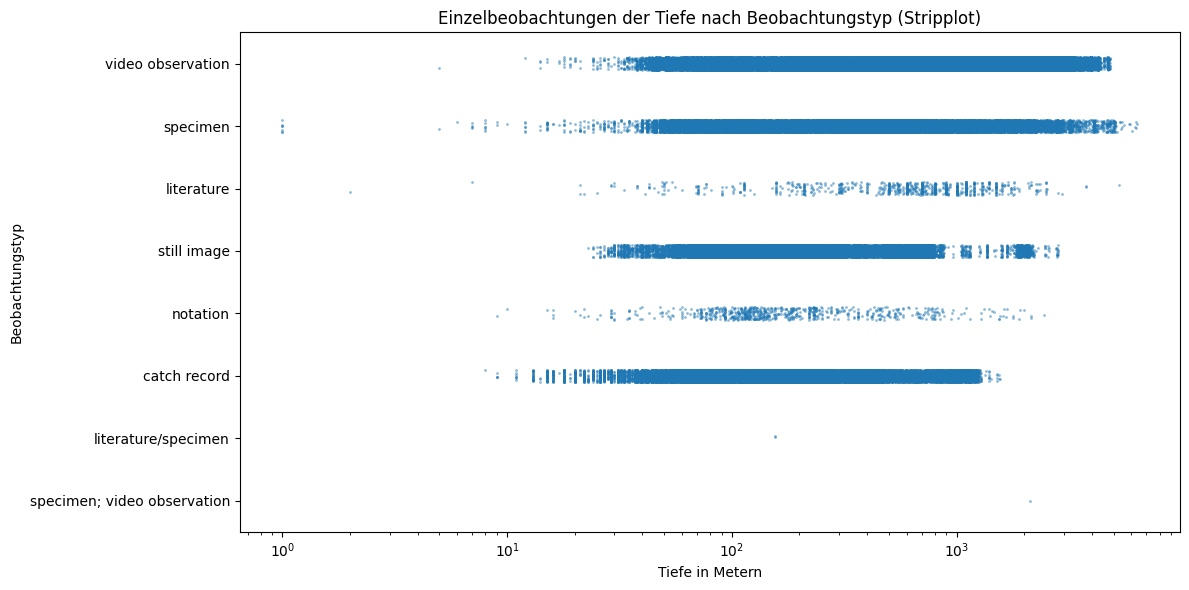

In [59]:
# Stripplot: Einzelbeobachtungen sichtbar machen mit zufälliger Streuung
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x="TiefeMeter", y="Beobachtungstyp", jitter=True, size=2, alpha=0.5)
plt.title("Einzelbeobachtungen der Tiefe nach Beobachtungstyp (Stripplot)")
plt.xlabel("Tiefe in Metern")
plt.ylabel("Beobachtungstyp")
plt.xscale("log")
plt.tight_layout()
plt.show()


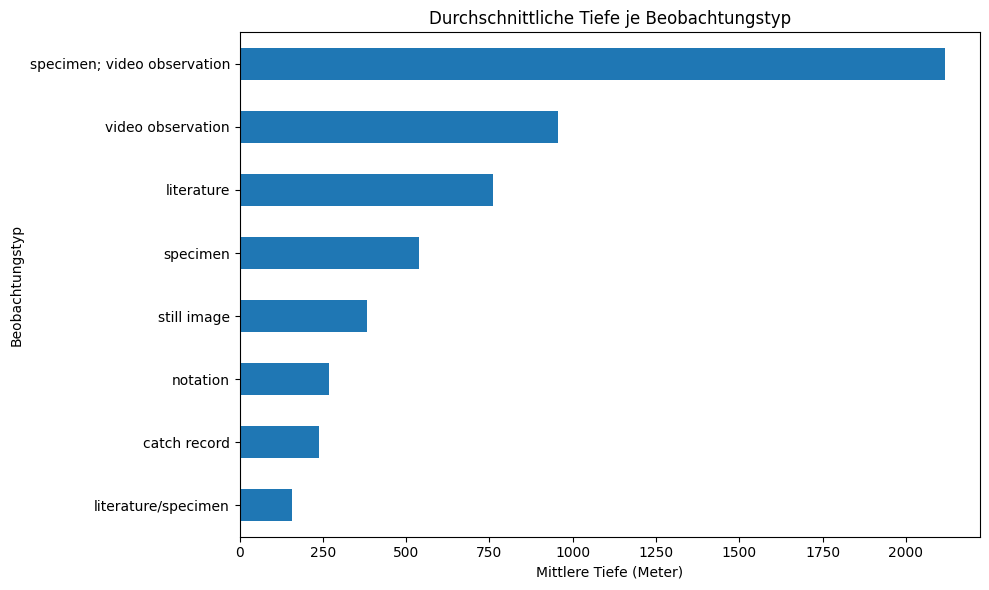

In [60]:
# Balkendiagramm: Durchschnittstiefe je Beobachtungstyp
df_mittel = df.groupby("Beobachtungstyp")["TiefeMeter"].mean().sort_values()
df_mittel.plot(kind="barh", figsize=(10, 6), title="Durchschnittliche Tiefe je Beobachtungstyp")
plt.xlabel("Mittlere Tiefe (Meter)")
plt.tight_layout()
plt.show()


In [61]:
# 21. Durchschnittliche Tiefe pro Datenquelle (Top 5)
top5 = df["Datenquelle"].value_counts().head(5).index
for quelle in top5:
    werte = df[df["Datenquelle"] == quelle]["TiefeMeter"].dropna()
    print(f"{quelle}: Ø {werte.mean():.2f} m, Median {werte.median():.1f}, Min {werte.min()}, Max {werte.max()}")


Monterey Bay Aquarium Research Institute: Ø 1283.01 m, Median 1084.0, Min 5.0, Max 3992.0
NOAA, Alaska Fisheries Science Center: Ø 453.71 m, Median 225.0, Min -999.0, Max 2875.0
NOAA, Southwest Fisheries Science Center, Santa Cruz: Ø 439.82 m, Median 483.0, Min 26.0, Max 866.0
NOAA, Olympic Coast National Marine Sanctuary: Ø 183.83 m, Median 191.0, Min -999.0, Max 373.0
Hawaii Undersea Research Laboratory: Ø 630.06 m, Median 411.0, Min 28.0, Max 2377.0


##  Phase 7: Technik & Methodik

In [62]:
df["ErhebungsID_anzeige"] = df["ErhebungsID"].fillna("Unbekannt")  # Für visuelle Vergleiche
top_surveys = df["ErhebungsID_anzeige"].value_counts().head(10)


In [63]:
# 22. Verwendete Geräte
print(df["Probengerät"].value_counts().head(10))


Probengerät
ROV             326289
submersible      70268
trawl            51899
towed camera     19626
longline          9481
dredge            2840
AUV               2535
drop camera       1262
grab               621
net                504
Name: count, dtype: int64


In [64]:
# 23. SurveyIDs mit den meisten Einträgen
print(df["ErhebungsID"].value_counts().head(10))


ErhebungsID
OCNMS200807                                                  24269
JSII_Aleutian2004                                            15094
Northern California Coral and Sponge Trawl Bycatch Cruise    14504
DSC MacII Leg 3                                              13148
Lophelia II 2009 Deepwater Coral Expedition                  12114
EX1504L2                                                     11149
AR06-07/07 (OCNMS200606)                                     10897
RIGS                                                         10157
Seamounts Cruise 2003                                         9922
Seamounts 2007                                                9803
Name: count, dtype: int64


In [69]:

# Regionale Verteilung (Top-Fundorte)
print(df["Fundort"].value_counts().head(10))




Fundort
Davidson Seamount                                                                   40114
Pioneer Seamount                                                                    23971
OLYMPIC COAST                                                                       22478
Rodriguez Seamount                                                                  18702
Olympic Coast National Marine Sanctuary                                             14042
Alaska; Aleutian Islands                                                            12021
Southern California Bight; Channel Islands National Marine Sanctuary; Piggy_Bank    11587
Viosca Knoll                                                                         9982
Shutter ridge                                                                        8351
Alaska; Gulf of Alaska                                                               7369
Name: count, dtype: int64


In [71]:
# Wie viele unterschiedliche Arten pro Fundort vorkommen
vielfalt = df.groupby("Fundort")["WissenschaftlicherName"].nunique().sort_values(ascending=False)
print(vielfalt.head(10))  # Hotspots


Fundort
Off Florida                                            239
off Florida                                            111
Alaska; Aleutian Islands                               108
Hawaiian Archipelago; Cross Seamount                   104
Main Hawaiian Islands; Oahu Island, Makapuu Pt          95
Northwestern Hawaiian Islands; Pioneer Bank             93
Straits Of Florida, Off Havana                          88
Main Hawaiian Islands; Hawaii Island, Keahole Pt        79
Main Hawaiian Islands; Molokai Island, Penguin Bank     75
off South Carolina                                      75
Name: WissenschaftlicherName, dtype: int64


In [77]:
# Mittelwerte der Tiefe nach Fundort und Taxonomischer Rangstufe
tiefen_matrix = df.pivot_table(index="Fundort", columns="TaxonomischeRangstufe", values="TiefeMeter", aggfunc="mean")


print(tiefen_matrix.head())


TaxonomischeRangstufe                               class  family  forma  \
Fundort                                                                    
1/2 way across the plateau- low relief irregula...    NaN   185.0    NaN   
10 Mile SW Of Bridgetown                              NaN     NaN    NaN   
100  Miles NE Of Patuca                               NaN     NaN    NaN   
100 Mile SE Of Charleston                             NaN     NaN    NaN   
100% hard bottom; Slope- flat; 100 % rubble; ri...    NaN   284.0    NaN   

TaxonomischeRangstufe                               genus  order  phylum  \
Fundort                                                                    
1/2 way across the plateau- low relief irregula...    NaN    NaN     NaN   
10 Mile SW Of Bridgetown                              NaN    NaN     NaN   
100  Miles NE Of Patuca                               NaN    NaN     NaN   
100 Mile SE Of Charleston                             NaN    NaN     NaN   
100% hard b